In [1]:
import pandas as pd
import matplotlib as plt
import re
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [3]:
lo=fb[fb.page_name=="林德福"]
lo.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19135,888230767933636_2145125488910818,888230767933636,林德福,政治人物,【永和帳務中心】\r\n\r\n新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成...,NaN,link,https://www.facebook.com/888230767933636/posts...,2019-03-16T10:24:13+0000,2019-03-16T18:24:13,...,永和帳務中心活化有成 未來擬轉型公托、托老,新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成果展，市長侯友宜、立委林德福、市...,159,0,0,0,0,0,3,0


In [4]:
#爬到的最後一篇
lo[lo.created_time_taipei == max(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19342,888230767933636_2729328570490504,888230767933636,林德福,政治人物,【車隊 雙和遶境】\r\n\r\n選前最後一日，新北市長侯友宜特別陪伴德福，車隊在雙和遶境，...,NaN,photo,https://www.facebook.com/888230767933636/posts...,2020-01-10T09:31:18+0000,2020-01-10T17:31:18,...,林德福貼文的相片,NaN,567,0,0,0,0,0,21,12


In [5]:
#爬到的第一篇
lo[lo.created_time_taipei == min(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19141,888230767933636_2128021767287857,888230767933636,林德福,政治人物,【台農發 虧損7000萬】\r\n\r\n今日立法院財委會質詢，我針對台農發公司成立2年多，...,NaN,photo,https://www.facebook.com/888230767933636/posts...,2019-03-04T08:22:18+0000,2019-03-04T16:22:18,...,NaN,NaN,655,0,0,0,0,0,81,24


In [6]:
#讓我們來做個時間排序吧
lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
lo['post_hour']=pd.to_datetime(lo['created_time_taipei']).dt.hour
lo.head(1)

<ipython-input-6-793464da8639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
<ipython-input-6-793464da8639>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
<ipython-input-6-793464da8639>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
19135,888230767933636_2145125488910818,888230767933636,林德福,政治人物,【永和帳務中心】\r\n\r\n新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成...,NaN,link,https://www.facebook.com/888230767933636/posts...,2019-03-16T10:24:13+0000,2019-03-16T18:24:13,...,0,0,0,0,0,3,0,2019-03-16,2019-03,18


In [7]:
#整個月份的總量
results = lo.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-03,11546999983137268,5809,0,0,0,0,0,509,85,211
2019-04,22205769198340900,22101,0,0,0,0,0,1035,291,356
2019-05,26646923038009080,8069,0,0,0,0,0,725,150,409
2019-06,18652846126606356,11002,0,0,0,0,0,306,298,287
2019-07,21317538430407264,8710,0,0,0,0,0,469,297,332
2019-08,20429307662473628,16075,0,0,0,0,0,444,342,347
2019-09,18652846126606356,7612,0,0,0,0,0,366,356,323
2019-10,19541076894539992,8532,0,0,0,0,0,327,239,321
2019-11,14211692286938176,7068,0,0,0,0,0,825,317,210


In [8]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-03,11546999983137268,5809,0,0,0,0,0,509,85,211
1,2019-04,22205769198340900,22101,0,0,0,0,0,1035,291,356
2,2019-05,26646923038009080,8069,0,0,0,0,0,725,150,409
3,2019-06,18652846126606356,11002,0,0,0,0,0,306,298,287
4,2019-07,21317538430407264,8710,0,0,0,0,0,469,297,332
5,2019-08,20429307662473628,16075,0,0,0,0,0,444,342,347
6,2019-09,18652846126606356,7612,0,0,0,0,0,366,356,323
7,2019-10,19541076894539992,8532,0,0,0,0,0,327,239,321
8,2019-11,14211692286938176,7068,0,0,0,0,0,825,317,210
9,2019-12,14211692286938176,11605,0,0,0,0,0,671,277,222


In [9]:
results['newhead'].map(str)

0     2019-03
1     2019-04
2     2019-05
3     2019-06
4     2019-07
5     2019-08
6     2019-09
7     2019-10
8     2019-11
9     2019-12
10    2020-01
Name: newhead, dtype: object

In [10]:
#發文時間分佈
post_time = lo[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,1
1,5,1
2,6,2
3,7,2
4,8,3
5,9,11
6,10,18
7,11,23
8,12,6
9,13,2


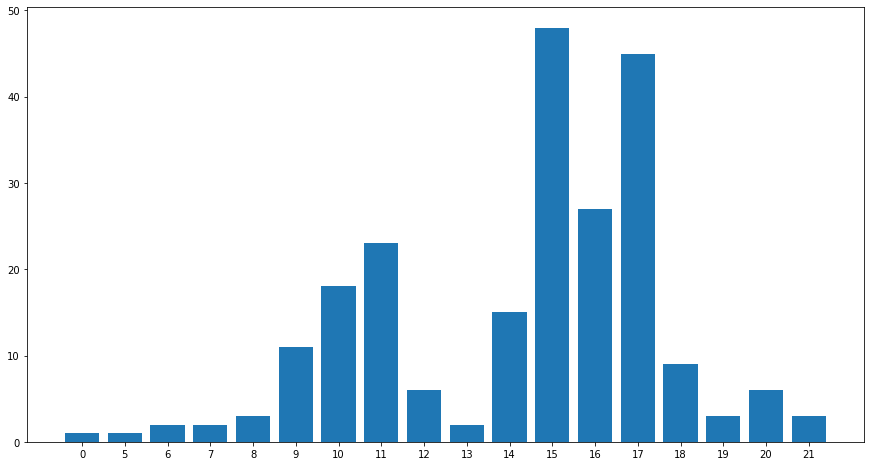

In [11]:
# 以圖表呈現時間分佈
import matplotlib.pyplot as plt

labels = post_time['post_hour'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, post_time['post_id'])

plt.show()

In [12]:
#整年貼文數量分佈
whole_year = lo[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-03,13
1,2019-04,25
2,2019-05,30
3,2019-06,21
4,2019-07,24
5,2019-08,23
6,2019-09,21
7,2019-10,22
8,2019-11,16
9,2019-12,16


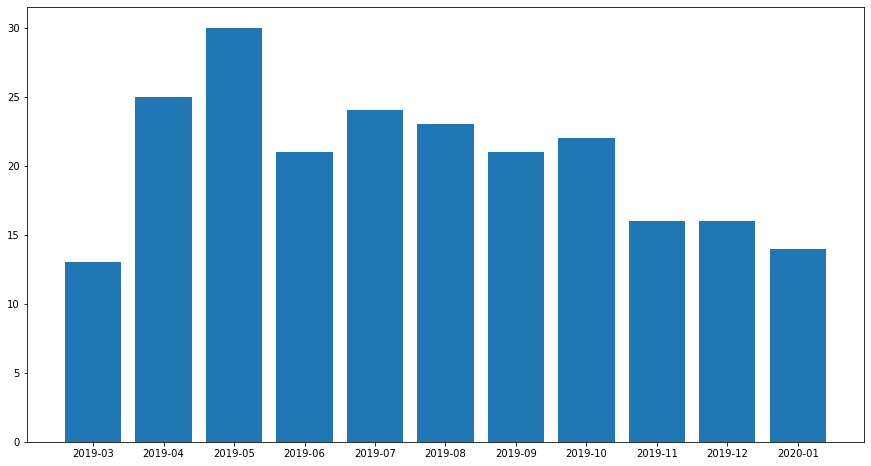

In [13]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.bar(labels, whole_year['post_id'])

plt.show()

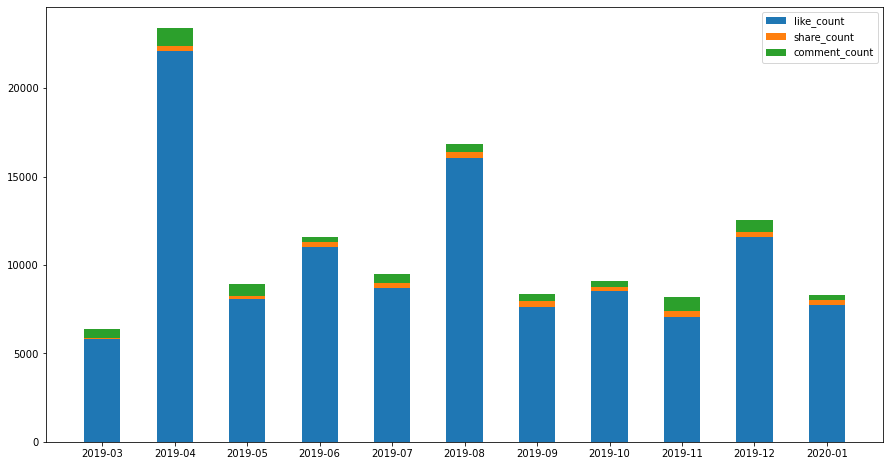

In [14]:
#按讚、分享、留言分佈
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

No handles with labels found to put in legend.


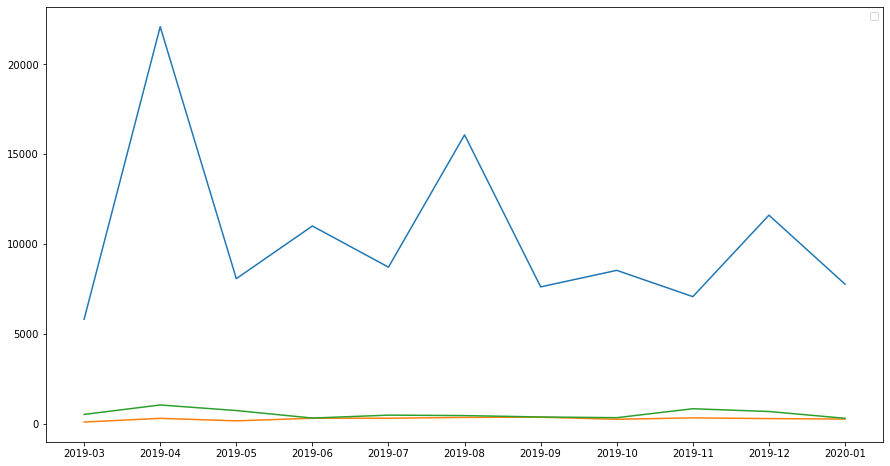

In [15]:
#個別攤開以折線檢視
labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results['like_count'])
ax.plot(labels, results['share_count'])
ax.plot(labels, results['comment_count'])

ax.legend()

plt.show()

## 第十屆立委選舉日，民國109年（2020年）1月11號舉行，但為什麼2019年4月跟8月有較高的觸及？

In [16]:
April = lo[lo.month_year == "2019-04"]

In [17]:
results_apl  = April.groupby('new_date').sum()
results_apl.index.name = 'new_date'
results_apl.reset_index(inplace=True)
results_apl

,new_date,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-04-01,888230767933636,132,0,0,0,0,0,10,3,11
1,2019-04-02,1776461535867272,322,0,0,0,0,0,25,3,31
2,2019-04-04,888230767933636,1922,0,0,0,0,0,39,14,9
3,2019-04-05,888230767933636,2211,0,0,0,0,0,31,27,8
4,2019-04-08,888230767933636,71,0,0,0,0,0,4,2,17
5,2019-04-09,888230767933636,879,0,0,0,0,0,60,29,14
6,2019-04-11,888230767933636,1889,0,0,0,0,0,105,53,16
7,2019-04-12,888230767933636,1669,0,0,0,0,0,86,23,15
8,2019-04-13,888230767933636,2827,0,0,0,0,0,64,15,17
9,2019-04-14,888230767933636,282,0,0,0,0,0,20,2,10


No handles with labels found to put in legend.


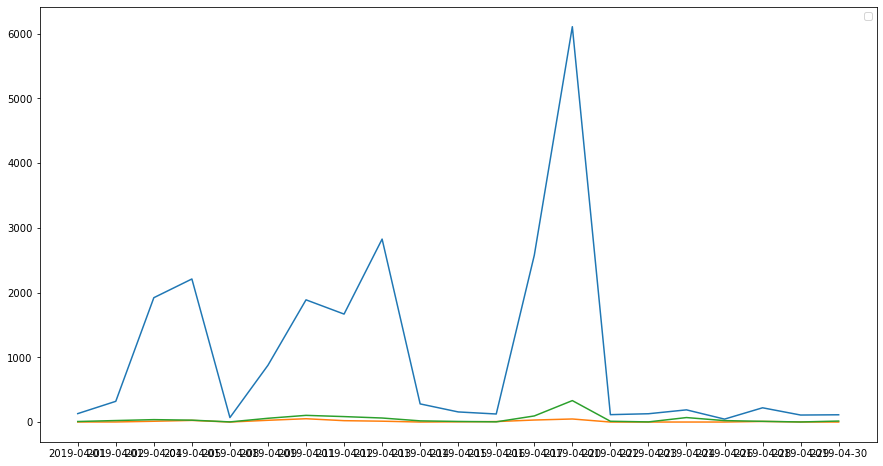

In [18]:
#畫圖 看整個月按讚、分享、評論的流量
labels = results_apl['new_date'].map(str)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_apl['like_count'])
ax.plot(labels, results_apl['share_count'])
ax.plot(labels, results_apl['comment_count'])

ax.legend()

plt.show()

## 從上述的途中我們可以看得出來，最高的篇數分別落在20號，內容個分別為甚麼？¶ 

In [19]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-04-20"]

<ipython-input-19-ffed61c44f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
19169,888230767933636_2199600456796654,888230767933636,林德福,政治人物,【完勝初選】\r\n\r\n永和區、中和秀安區鄉親，國民黨黨內初選，德福完勝，將代表國民黨繼...,NaN,photo,https://www.facebook.com/888230767933636/posts...,2019-04-20T03:09:38+0000,2019-04-20T11:09:38,...,0,0,0,0,0,333,49,2019-04-20,2019-04,11


## 4/20永和區黨內初選 登記完成
https://www.facebook.com/lintefu/posts/2148167231939977/

In [20]:
Aug = lo[lo.month_year == "2019-08"]

In [21]:
results_apl  = Aug.groupby('new_date').sum()
results_apl.index.name = 'new_date'
results_apl.reset_index(inplace=True)
results_apl

,new_date,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-08-01,888230767933636,251,0,0,0,0,0,1,5,17
1,2019-08-02,888230767933636,203,0,0,0,0,0,6,13,17
2,2019-08-05,888230767933636,124,0,0,0,0,0,2,0,17
3,2019-08-06,888230767933636,2585,0,0,0,0,0,45,44,16
4,2019-08-07,888230767933636,2602,0,0,0,0,0,48,60,17
5,2019-08-08,888230767933636,2020,0,0,0,0,0,22,23,15
6,2019-08-09,888230767933636,489,0,0,0,0,0,21,29,10
7,2019-08-11,888230767933636,1139,0,0,0,0,0,62,20,10
8,2019-08-13,888230767933636,89,0,0,0,0,0,9,0,18
9,2019-08-14,888230767933636,71,0,0,0,0,0,3,8,10


In [22]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-08-15"]

<ipython-input-22-fa1592dccd3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
19266,888230767933636_2410737809016250,888230767933636,林德福,政治人物,【永和區 首例登革熱】\r\n\r\n永和區發生首例登革熱，已經有聯絡相關單位，通知並請針對...,NaN,link,https://www.facebook.com/888230767933636/posts...,2019-08-15T02:24:43+0000,2019-08-15T10:24:43,...,0,0,0,0,0,4,8,2019-08-15,2019-08,10
19267,888230767933636_2410662409023790,888230767933636,林德福,政治人物,【中元節】\r\n\r\n今天是農曆七月十五，中元節又稱「鬼節」或「孟蘭盆會」。除了祭祀神明...,NaN,photo,https://www.facebook.com/888230767933636/posts...,2019-08-15T01:22:01+0000,2019-08-15T09:22:01,...,0,0,0,0,0,57,41,2019-08-15,2019-08,9


## 8/15 慶祝中元節
https://www.facebook.com/lintefu/posts/2410662409023790

In [24]:
# 整年 貼文分享數最高 
share_top10 = lo.sort_values('like_count',ascending=False).head(10)
share_top10 = share_top10[['message','like_count']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,like_count
19169,【完勝初選】\r \r 永和區、中和秀安區鄉親，國民黨黨內初選，德福完勝，將代表國民黨繼續競...,6107
19294,【重陽節】\r \r 或稱敬老節或踏秋節，於每年的農曆九月初九，故又稱「九九」，感謝每位年長...,3364
19175,【母親節快樂】\r \r 祝福全天下的媽媽、老婆、小孩 母親節快樂！！！\r \r #母親節,3228
19269,【中秋節】\r \r 月圓人團圓，平安度佳節！三天的中秋假期大家都規劃好了嗎？烤肉時小心火燭...,3128
19267,【中元節】\r \r 今天是農曆七月十五，中元節又稱「鬼節」或「孟蘭盆會」。除了祭祀神明、祖...,3005
19150,【掃街】\r \r 過去兩星期，我帶著團隊，無論學校、公園、市場、捷運站，不分早晨、中午、晚...,2827
19202,【警察節】\r \r 6月15日是年度警察節，平時維持秩序、打擊罪犯、處理各種民眾疑難雜症，...,2666
19337,【幸福城市 安居雙和】\r \r 各位雙和好朋友，明年1月11日，再次懇託集中選票，立法委員...,2618
19250,【父親節】\r \r 家人是一輩子珍貴的禮物，牽起父親的手，陪他好好吃一頓飯、陪他慢慢走走路...,2602
19251,【七夕】\r \r 每年的農曆七月初七，想好要如何與另一半度過佳節了嗎？無論是否有另一半，都...,2585
